# Color Extraction

This tool experiments with the HSV color space to extract specific colors or ranges of colors from an image. 

The HSV color space is made up of the three components (or channels):

- **Hue:** pixel color
- **Saturation:** pixel purity
- **Value:** pixel brightness

Trackbars allow you to set the upper and lower pixel bounds for each channel. Changing the range of the H channel will allow specific colors or color ranges to be extracted.

In [6]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Function for all trackbar calls
def updateImage():
    # Convert the image to HSV
    hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

    # Threshold the HSV image to get only selected range
    mask = cv2.inRange(hsv, lowerBounds, upperBounds)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(hsv, hsv, mask = mask)
    
    # Convert the image back to BGR    
    bgr = cv2.cvtColor(res, cv2.COLOR_HSV2BGR)

    # Show new image
    cv2.imshow("Color Extraction", bgr)
    
    
# Function to update H channel minimum value
def updateHMinimum(*args):
    lowerBounds[0] = args[0]
    updateImage()
    pass

# Function to update H channel maximum value
def updateHMaximum(*args):
    upperBounds[0] = args[0]
    updateImage()
    pass

# Function to update S channel minimum value
def updateSMinimum(*args):
    lowerBounds[1] = args[0]
    updateImage()
    pass

# Function to update S channel maximum value
def updateSMaximum(*args):
    upperBounds[1] = args[0]
    updateImage()
    pass

# Function to update V channel minimum value
def updateVMinimum(*args):
    lowerBounds[2] = args[0]
    updateImage()
    pass

# Function to update V channel maximum value
def updateVMaximum(*args):
    upperBounds[2] = args[0]
    updateImage()
    pass

In [4]:
# Read sample image
src = cv2.imread('Images/capsicum.jpg', cv2.IMREAD_COLOR)

# Create named window for image
cv2.startWindowThread()
cv2.namedWindow("Color Extraction", cv2.WINDOW_AUTOSIZE)
cv2.imshow("Color Extraction", src)

# Initial upper and lower bounds
lowerBounds = np.array([0, 0, 0])
upperBounds = np.array([255, 255, 255])

# Create trackbars to control each channel's min and max thresholds
cv2.createTrackbar('H Min', 'Color Extraction', 0,   255, updateHMinimum)
cv2.createTrackbar('H Max', 'Color Extraction', 255, 255, updateHMaximum)
cv2.createTrackbar('S Min', 'Color Extraction', 0,   255, updateSMinimum)
cv2.createTrackbar('S Max', 'Color Extraction', 255, 255, updateSMaximum)
cv2.createTrackbar('V Min', 'Color Extraction', 0,   255, updateVMinimum)
cv2.createTrackbar('V Max', 'Color Extraction', 255, 255, updateVMaximum)

# Close window when user presses a key
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

255

There's some sort of bug preventing the trackbars from turning up in order, but the window looks something like this:

<img src = "Images/window-capsicum.png", width = 500, height = 500>

The color red exists across the ends of the 0-255 range (i.e. 0-10 and 245-255) which makes it difficult to extract, but blues and greens have been filtered as below.

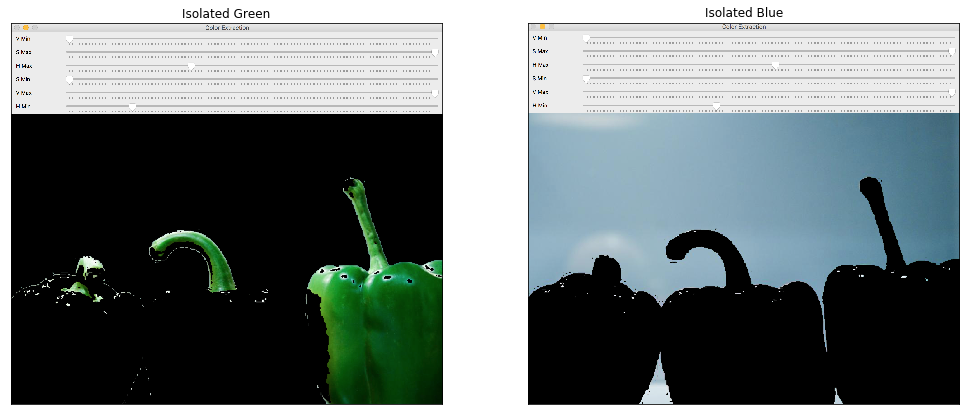

In [18]:
green = cv2.imread('Images/green-capsicum.png', cv2.IMREAD_COLOR)
green = cv2.cvtColor(green, cv2.COLOR_BGR2RGB)
blue = cv2.imread('Images/blue-capsicum.png', cv2.IMREAD_COLOR)
blue = cv2.cvtColor(blue, cv2.COLOR_BGR2RGB)

# Display images
fig = plt.figure(figsize = (17, 10))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Isolated Greens')
_ = ax1.imshow(green)
ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Isolated Blues')
_ = ax2.imshow(blue)